
# Project: Investigate a Dataset - [European Soccer Database] 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I investigate European Soccer Database from Kaggle, and is well suited for data analysis and consists of seven tables namely 'Country', 'League', 'Player', 'Player Attributes', 'Team', 'Team Attributes', and 'Match', the dataset contains useful statistics about 11 different European Leagues between 2008 and 2016, This dataset is quite extensive, and stored in a SQLite database.

### Question(s) for Analysis
Question 1 : What teams improved the most over the time period?

Question 2 : Which players had the most penalties?

Question 3: Statistics of Players' Heights
.Does The height of a player Affect his Acceleration?

Question 4: Statistics of Players' weight
.Does The weight of a player Affect his Shot Power?

Question 5: What team attributes lead to the most victories?

Question 6 (What is the Total matches, wins, goals per League?)

Question 7 : How has FC Barcelona United's performance been over the years at Home and Away?

In [1]:
# import the modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy as sqla
from datetime import datetime

#magic word makes the charts more sharp
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties
Here,As Data is in SQLite Database , we will first load the data into dataframes and load the database and query each table seperately in order and check for missing values and duplicates, triming and cleaning the dataset for analysis.

In [2]:
# connect to the SQLite database with SQLAlchemy and read data
soccer = sqla.create_engine('sqlite:///database.sqlite')

# reconquest all tables
df_country = pd.read_sql('select * from Country' , soccer)
df_league = pd.read_sql('select * from League' , soccer)
df_player = pd.read_sql('select * from Player' , soccer)
df_player_attr = pd.read_sql('select *from Player_Attributes' , soccer)
df_team = pd.read_sql('select * from Team' , soccer)
df_team_attr = pd.read_sql('select * from Team_Attributes' , soccer)
df_match = pd.read_sql('select * from Match' , soccer)

In [3]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [4]:
df_country.shape

(11, 2)

now we see the country table has 2 columns (id , name) plus 11 row ,thats mean we're dealing with 11 unique countries

In [5]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


 the leagues of eleven countries

In [6]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [7]:
#getting some information about table:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 518.5+ KB


here we see dtype of birthday columns should be convert from string to datetime

In [8]:
sum(df_player.duplicated())

0

there is no duplicate in df_player

In [9]:
df_player.isnull() .sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

there is no null value

In [10]:
df_player.shape

(11060, 7)

In [11]:
len(df_player.player_name.unique())

10848

There are 10848 unique player names out of 11060 which is acceptable because there are several names like Alex, Diego,Kiko that are common as a full name

In [12]:
df_player.query("player_name == 'Alex'")

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
437,438,150396,Alex,186613,1989-01-29 00:00:00,182.88,170
438,440,163838,Alex,198033,1991-08-27 00:00:00,175.26,148
439,442,26564,Alex,136130,1982-06-17 00:00:00,187.96,203


This time, I decided to group player_name and player_api_id together to search the unique players.

In [13]:
df_player.groupby(['player_name' , 'player_api_id']) .count().count()

id                    11060
player_fifa_api_id    11060
birthday              11060
height                11060
weight                11060
dtype: int64

In [14]:
# getting some information about player attributes
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

this too we should Convert data types of 'date' columns represented as string to datetime

In [15]:
df_player_attr.shape

(183978, 42)

In [16]:
df_player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [17]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

in the team attributes table, I see that there is one foreign key (i.e. player_api_id). I need to know the names of the players. I'll apply a merge operation over the Player table later on. This table is so essential to find out interesting statistics about players performance over the years.

In [18]:
df_team.shape

(299, 5)

In [19]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [20]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 9.4+ KB


we have none value in team_fifa_api_id and we fix it in the cleaning

In [21]:
df_team.isnull() .sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [22]:
df_team.isnull() .sum().sum()

11

In [23]:
len(df_team.team_long_name.unique())
#df_team['team_long_name'].duplicated().sum(),len(df_team.team_long_name.unique()), df_team['team_long_name'].count()
#df_team['team_long_name'].isnull().sum().any()

296

299 teams are waiting us to explore. The team_long_name column contains 296 unique team name, there should be 6 duplicate rows I think

In [24]:
sum(df_team.duplicated())

0

there is no duplicate in team table,I expect 6 rows but nothing shows up. I need to investigate more on that problem because, It's abnormal for two teams having the same name.

In [25]:
df_team_attr.shape

(1458, 25)

In [26]:
df_team_attr.head()
#We notice that there are two issues in the Teams Attributes data set:¶
#a. NaN values in the 'buildUpPlayDribbling' column
#b. Wrong data type of the 'date' column

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Here, we need to know the team name of each row because team_api_id corresponds to a team. We'll perform another merge operation on the Team table.

In [27]:
df_match.shape

(25979, 115)

In [28]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In the match table, I have seen 4 important id columns (i.e. country_id, league_id, home_team_api_id, and away_team_api_id). After merging the corresponding tables with the match table

In [29]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 21.8+ MB


In [30]:
sum(df_match.duplicated())

0

In [31]:
# number of missing values
df_match.isnull().sum().sum()

407395

In [32]:
df_match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

There are a lot of missing values in the match table. I can drop some columns that we are not interested in.

### Data Cleaning : Player and Player Attributes Tables

Now I start cleaning the tables by adding new columns and dropping columns that we don't use for the questions.

In [33]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [34]:
df_player.rename(columns = {'id':'player_id'}, inplace=True)
df_player.head()

,player_id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [35]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
player_id             11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 518.5+ KB


We should convert the birthday column from String to datetime in the player table.

In [36]:
df_player['birthday']= pd.to_datetime(df_player['birthday'])

In [37]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
player_id             11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null datetime64[ns]
height                11060 non-null float64
weight                11060 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 561.7+ KB


In [38]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

we should Convert data types of 'date' columns from string to datetime in the player attributes

In [39]:
# check if there are any duplicates in df_player_attr dataset
df_player_attr.duplicated().sum()

0

In [40]:
# get basic statistical data for the df_player_attr dataset
df_player_attr.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [41]:
# check the number of missing data in each column of df_player_att dataset
df_player_attr.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [42]:
# Drop all rows with missing data in dataset df_player_attr
df_player_attr.dropna(inplace=True)

In [43]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

all missing value is dropped

In [44]:
# now we convert the date column from String to date in the Player Attributes table.
df_player_attr['date']= pd.to_datetime(df_player_attr['date'])

#df_player_attr.penalties.replace([np.inf,-np.inf],np.nan,inplace=True)
#df_player_attr.penalties.dropna(inplace=True)

#convert the datatype for penalties from float to int
df_player_attr.penalties = df_player_attr.penalties.astype(np.int64)

In [45]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null datetime64[ns]
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float6

In [46]:
df_player_attr.shape

(180354, 42)

In [47]:
df_player.head()

,player_id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154


In [48]:
df_player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,54.0,48,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,54.0,48,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,54.0,48,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,53.0,47,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,53.0,47,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


we again use a merge operation to combine players and the player attributes tables:

In [49]:
df_player_attr = df_player_attr.merge(df_player, left_on='player_api_id', right_on='player_api_id')

In [50]:
#df_player_attr.rename(columns={'id_x': 'id'}, inplace=True)

In [51]:
df_player_attr.drop(columns=['id', 'player_fifa_api_id_y', 'player_fifa_api_id_x'], inplace=True)

In [52]:
df_player_attr.head()

,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_id,player_name,birthday,height,weight
0,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29,182.88,187
1,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29,182.88,187
2,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,...,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29,182.88,187
3,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,5.0,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,1992-02-29,182.88,187
4,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,5.0,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,1992-02-29,182.88,187


In [53]:
df_player_attr.shape

(180354, 45)

look the number of columns has increased

In [54]:
df_player_attr.to_csv('player_attr_clean.csv' ,index=False)

### Data Cleaning : Team and Team Attributes Tables

 Do you remember we found  296 unique team names but the total rows of the table is 299!

In [55]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


df_team.rename(columns = {'id':'team_id'}, inplace=True)
df_team.head()

In [56]:
# check the duplicates teams
df_team.team_long_name.value_counts()[df_team.team_long_name.value_counts() >= 2]

Polonia Bytom           2
Royal Excel Mouscron    2
Widzew Łódź             2
Name: team_long_name, dtype: int64

In [57]:
# let's find duplicated teams by team_long_name and team_fifa_api_id
group_fifa_id_and_team_name = df_team.groupby(['team_fifa_api_id','team_long_name'])
                                              
# True if the count is greater than and equal to 2
dupicated_teams= group_fifa_id_and_team_name['id'].count().apply(lambda count: count >= 2)

group_fifa_id_and_team_name['id'].count()[dupicated_teams]

team_fifa_api_id  team_long_name      
301.0             Widzew Łódź             2
111429.0          Polonia Bytom           2
111560.0          Royal Excel Mouscron    2
Name: id, dtype: int64

In [58]:
df_team.query('team_long_name == "Widzew Łódź"')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
189,31451,8244,301.0,Widzew Łódź,LOD
199,32409,8024,301.0,Widzew Łódź,WID


In [59]:
df_team.query('team_long_name == "Polonia Bytom"')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
182,31444,8031,111429.0,Polonia Bytom,POB
183,31445,8020,111429.0,Polonia Bytom,GOR


In [60]:
df_team.query('team_long_name == "Royal Excel Mouscron"')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
15,16,9996,111560.0,Royal Excel Mouscron,MOU
24,2510,274581,111560.0,Royal Excel Mouscron,MOP


we can drop ones .

In [61]:
df_team.drop(index=[199, 183, 24], inplace=True)

Now this is better

In [62]:
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

We Convert data types of 'date' columns from string to datetime

In [63]:
df_team_attr['date']= pd.to_datetime(df_team_attr['date'])
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null datetime64[ns]
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreatio

We need to merge the team attribute table with the team table.

In [64]:
df_team_attr_merged = df_team_attr.merge(df_team, left_on='team_api_id', right_on='team_api_id')

In [65]:
df_team_attr_merged.head()

,id_x,team_fifa_api_id_x,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,id_y,team_fifa_api_id_y,team_long_name,team_short_name
0,1,434,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,...,Medium,55,Press,45,Normal,Cover,49119,434.0,FC Aarau,AAR
1,2,434,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
2,3,434,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
3,4,77,8485,2010-02-22,70,Fast,NaN,Little,70,Long,...,Medium,70,Double,70,Wide,Cover,39393,77.0,Aberdeen,ABE
4,5,77,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,...,Medium,47,Press,52,Normal,Cover,39393,77.0,Aberdeen,ABE


In [66]:
df_team_attr_merged.drop(columns=['team_fifa_api_id_x','id_y', 'team_fifa_api_id_y'], inplace=True)

In [67]:
df_team_attr_merged.rename(columns={'id_x': 'id','team_fifa_api_id_x': 'team_fifa_api_id'}, inplace=True)

In [68]:
df_team_attr_merged.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,1,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,Organised,...,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR
1,2,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
2,3,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
3,4,8485,2010-02-22,70,Fast,NaN,Little,70,Long,Organised,...,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE
4,5,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,Organised,...,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE


let's try add a year column as well into the table.

In [69]:
df_team_attr_merged['year'] = df_team_attr_merged['date'].dt.year

In [70]:
df_team_attr_merged.to_csv('team_attributes_edited.csv', index=False)

In [71]:
df_team_attr_merged.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name,year
0,1,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,Organised,...,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR,2010
1,2,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,Organised,...,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR,2014
2,3,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,Organised,...,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR,2015
3,4,8485,2010-02-22,70,Fast,NaN,Little,70,Long,Organised,...,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE,2010
4,5,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,Organised,...,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE,2011


### Data Cleaning : The Match Table

 Remember we found many missing data so now i drop each columns that contains missing value.

In [72]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [73]:
#delete all columns with null values
df_match.dropna(axis='columns' , inplace=True)

In [74]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [75]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(9), object(2)
memory usage: 2.0+ MB


convert the date column to datatime

In [76]:
df_match['date']= pd.to_datetime(df_match['date'])

In [77]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null datetime64[ns]
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 2.1+ MB


now it's Better

In [78]:
df_match['year']=df_match['date'].dt.year

 Now we add another column as well as a year column

I want to divide the 'season' column into 2 seperate columns ('start_season' and 'end_season').

In [79]:
start_season = df_match['season'].apply(lambda x: x.split("/")[0])
end_season = df_match['season'].apply(lambda x: x.split("/")[1])

In [80]:
df_match['start_season'] = start_season
df_match['end_season'] = end_season

In [81]:
# we don't need this column anymore so we drop it
df_match.drop(columns=['season'], axis=1, inplace=True)

In [82]:
df_match.head()

,id,country_id,league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,start_season,end_season
0,1,1,1,1,2008-08-17,492473,9987,9993,1,1,2008,2008,2009
1,2,1,1,1,2008-08-16,492474,10000,9994,0,0,2008,2008,2009
2,3,1,1,1,2008-08-16,492475,9984,8635,0,3,2008,2008,2009
3,4,1,1,1,2008-08-17,492476,9991,9998,5,0,2008,2008,2009
4,5,1,1,1,2008-08-16,492477,7947,9985,1,3,2008,2008,2009


Now I want to get away from id columns which are country_id, leage_id, home_team_api_id and away_team_api_id in order to do that

In [83]:
# rename name to country_name and id to country_id
df_country.rename(columns={'name' : 'country_name', 'id': 'country_id'}, inplace=True)
df_country.head()

,country_id,country_name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


 We need to find the corresponding names of each id from others tables by merging with the match tabel.

In [84]:
#we start with country tabel
df_match = df_match.merge(df_country, how='inner', left_on='country_id', right_on='country_id')

# drop  country_id
df_match.drop(columns=['country_id'], inplace=True)

df_match.head()

,id,league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name
0,1,1,1,2008-08-17,492473,9987,9993,1,1,2008,2008,2009,Belgium
1,2,1,1,2008-08-16,492474,10000,9994,0,0,2008,2008,2009,Belgium
2,3,1,1,2008-08-16,492475,9984,8635,0,3,2008,2008,2009,Belgium
3,4,1,1,2008-08-17,492476,9991,9998,5,0,2008,2008,2009,Belgium
4,5,1,1,2008-08-16,492477,7947,9985,1,3,2008,2008,2009,Belgium


In [85]:
# We don't add the league dataset so I copy it:
df_copy_league = df_league.copy()

df_copy_league.rename(columns={'name': 'league_name', 'id': 'league_id'}, inplace=True)
df_match = df_match.merge(df_copy_league, how='inner', left_on='league_id', right_on='league_id')

# drop country_id and league_id
df_match.drop(columns=['league_id', 'country_id'], inplace=True)
              
df_match.head()

,id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name
0,1,1,2008-08-17,492473,9987,9993,1,1,2008,2008,2009,Belgium,Belgium Jupiler League
1,2,1,2008-08-16,492474,10000,9994,0,0,2008,2008,2009,Belgium,Belgium Jupiler League
2,3,1,2008-08-16,492475,9984,8635,0,3,2008,2008,2009,Belgium,Belgium Jupiler League
3,4,1,2008-08-17,492476,9991,9998,5,0,2008,2008,2009,Belgium,Belgium Jupiler League
4,5,1,2008-08-16,492477,7947,9985,1,3,2008,2008,2009,Belgium,Belgium Jupiler League


We need to know which teams played together:

In [86]:
df_copy_team = df_team.copy()

# we don't need 'team_fifa_api_id', 'team_short_name', and 'id' columns 
df_copy_team.drop(columns=[ 'team_fifa_api_id', 'team_short_name', 'id'], axis=1, inplace=True)

df_copy_team.head()

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge


In [87]:
df_match = df_match.merge(df_copy_team, how='inner', left_on='home_team_api_id', right_on='team_api_id')
df_match.rename(columns={'team_long_name': 'home_team_name'}, inplace=True)
df_match.drop(columns=['home_team_api_id', 'team_api_id'], axis=1, inplace=True)

df_match = df_match.merge(df_copy_team, how='left', left_on='away_team_api_id', right_on='team_api_id')
df_match.rename(columns={'team_long_name': 'away_team_name'}, inplace=True)
df_match.drop(columns=['team_api_id', 'away_team_api_id'], axis=1, inplace=True)

df_match.head()

,id,stage,date,match_api_id,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,away_team_name
0,1,1,2008-08-17,492473,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
1,29,12,2008-11-15,492583,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare
2,47,14,2008-11-29,492651,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge
3,65,16,2008-12-13,492713,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi
4,94,19,2009-01-24,492805,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons


In [88]:
#we don't need 'match_api_id' and 'stage' :
df_match.drop(['stage', 'match_api_id'], axis=1, inplace=True)

 We will create a new column called 'winners' and create a function to determine the values.

In [89]:
def winners(row):
    home_score = row[0]
    away_score = row[1]
    home_team_name = row[2]
    away_team_name = row[3]
    
    if home_score > away_score:
        return home_team_name
    elif home_score < away_score:
        return away_team_name
    else:
        return 'Tie'

df_match['winners']  = df_match[['home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name']].apply(winners, axis=1)

In [90]:
df_match.to_csv('matches_clean.csv', index=False)

we save the clean data Match table:

In [91]:
pd.read_csv('matches_clean.csv').head()

,id,date,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,away_team_name,winners
0,1,2008-08-17,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Tie
1,29,2008-11-15,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare,Tie
2,47,2008-11-29,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge,KRC Genk
3,65,2008-12-13,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi,KRC Genk
4,94,2009-01-24,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons,KRC Genk


<a id='eda'></a>
## Exploratory Data Analysis

## Research Question 1 : What teams improved the most over the time period?

Here, we choose 2 specfic years 2011, and 2016 to compare the details of the teams using these years we analyze what  teams improved the most ?

In [92]:
#we show the data table again
df_match.head()

,id,date,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,away_team_name,winners
0,1,2008-08-17,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Tie
1,29,2008-11-15,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare,Tie
2,47,2008-11-29,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge,KRC Genk
3,65,2008-12-13,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi,KRC Genk
4,94,2009-01-24,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons,KRC Genk


To select a year we should know how many unique years exist in the table?

In [93]:
unique_years= df_match.year.unique()
print(unique_years)

[2008 2009 2010 2011 2012 2013 2014 2015 2016]


In [94]:
len(df_match.away_team_name.unique()) == len(df_match.home_team_name.unique())

False

To be sure, we check the away and home team size is equal:

In [95]:
df_match_2011 = df_match.query('year == 2011')

df_match_2016 = df_match.query('year == 2016')

df_match_2011_away = df_match_2011.groupby(['away_team_name'])['away_team_goal'].mean()
df_match_2011_home = df_match_2011.groupby(['home_team_name'])['home_team_goal'].mean()

df_match_2016_away = df_match_2016.groupby(['away_team_name'])['away_team_goal'].mean()
df_match_2016_home = df_match_2016.groupby(['home_team_name'])['home_team_goal'].mean()

df_match_total_2016 = (df_match_2016_away + df_match_2016_home) / 2
df_match_total_2011 = (df_match_2011_away + df_match_2011_home) / 2


df_match_2016_2011 = df_match_total_2016 - df_match_total_2011

Here,we must compare team qualities, we should apply mean or other statistical approaches to estimate more about the teams so we declare 2 variables that hold matches from the selected years.

In [96]:
df_match_2016_2011.dropna(inplace=True)

 we can safely drop Missing values 

In [97]:
print('Improved teams :' + str(df_match_2016_2011[df_match_2016_2011.sort_values() > 0].count()))

Improved teams :81


In [98]:
sorted_index = df_match_2016_2011.sort_values().index

Now, we consume a horizontal bar so we can good measure the 296 teams's average quality horizontally from 2011 to 2016. The horizontal bar depicts that there are teams that didn't improve themselves.. Conversely 81 team have improvements over the years.

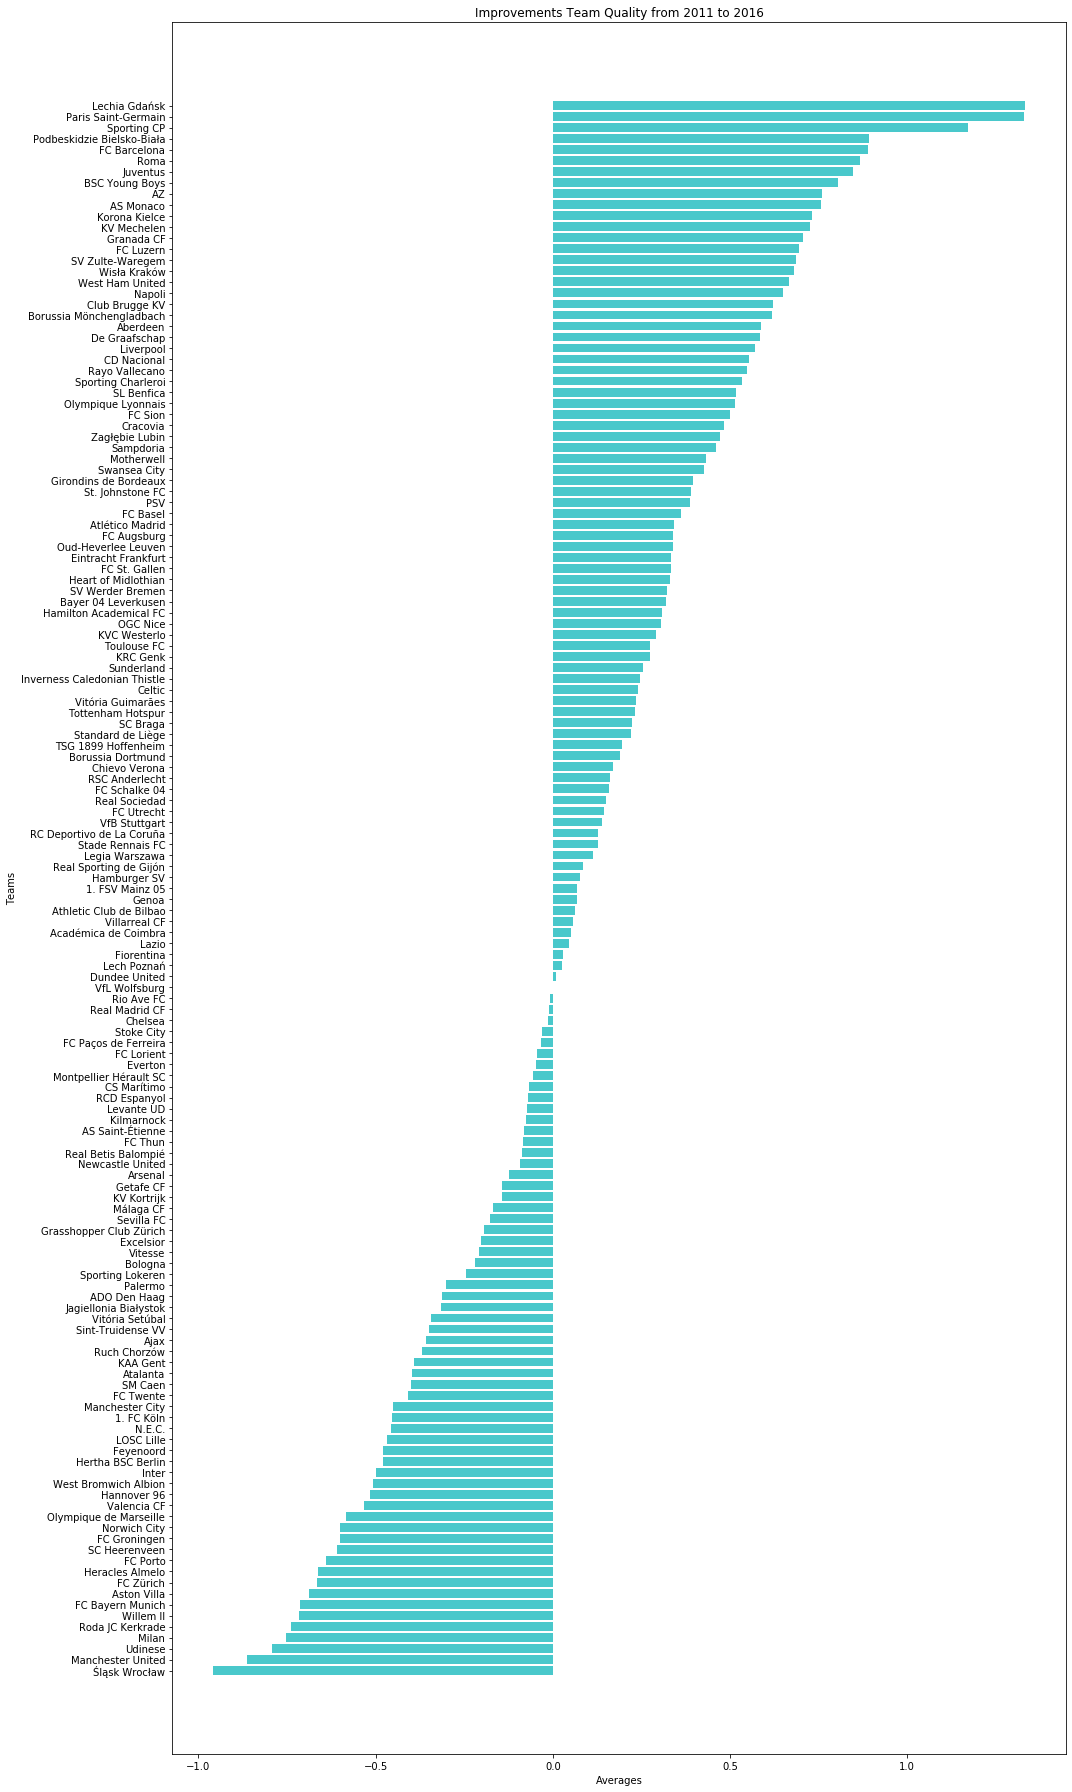

In [99]:
fig, ax = plt.subplots(figsize=(15, 25))
# plot of the horizontal bar
plt.barh(range(0,len(sorted_index)), df_match_2016_2011.sort_values(),color='#49c8cb')

# the position of the y ticks
ax.set_yticks(range(0,len(sorted_index)))

# the position of the y ticks labels
ax.set_yticklabels(sorted_index)

# the chart's title
ax.set_title('Improvements Team Quality from 2011 to 2016')

# the y axis label
ax.set_ylabel('Teams')

# the y axis label 
plt.xlabel("Averages")

plt.tight_layout();

## Research Question 2 : Which players had the most penalties?

In [100]:
players_stats = pd.read_csv('player_attr_clean.csv')
players_stats.head()

,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_id,player_name,birthday,height,weight
0,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29,182.88,187
1,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29,182.88,187
2,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,...,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,1992-02-29,182.88,187
3,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,5.0,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,1992-02-29,182.88,187
4,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,5.0,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,1992-02-29,182.88,187


In [101]:
players_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180354 entries, 0 to 180353
Data columns (total 45 columns):
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
acceleration           180354 non-null float64
sprint_speed           180354 non-null float64
ag

In [102]:
# groupby player_api_id and sum the number of penalties per player
players_stats= players_stats.groupby(['player_api_id', 'player_name'])['penalties'].sum().sort_values(ascending=False)[:10].reset_index()

In [103]:
players_stats

,player_api_id,player_name,penalties
0,41269,Alessio Cerci,4314
1,108808,Mario Balotelli,4120
2,41890,Claudio Marchisio,3984
3,26472,Michael Bradley,3813
4,25772,Zdravko Kuzmanovic,3799
5,30731,Andrea Pirlo,3791
6,27734,Antonio Di Natale,3767
7,30626,Thierry Henry,3712
8,40930,Adrien Silva,3682
9,47394,Adel Taarabt,3650


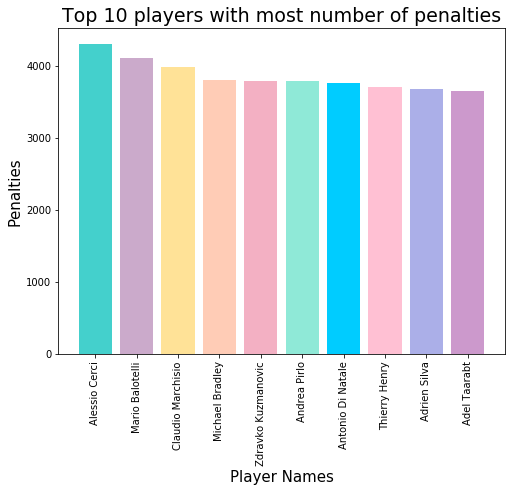

In [104]:
#we create bar graph showing the top 10 players with most number of penalties
fig, ax = plt.subplots(figsize = (8,6))
colors = ['#44d0cc','#CBAACB','#ffe297','#FFCCB6','#F3B0C3','#8fe9d7','#00ccff','#ffc0d3','#abafe8','#cc99cc']
plt.bar(players_stats['player_name'],players_stats['penalties'],color=colors);
plt.title("Top 10 players with most number of penalties", fontsize=19)
plt.xlabel("Player Names", fontsize=15)
plt.ylabel("Penalties", fontsize=15)
plt.xticks(rotation=90)
plt.show();

The following players have the most number of penalties:

   1. Alessio Cerci (4314)
   2. Mario Balotelli (4120)
   3. Claudio Marchisio (3984)
   4. Michael Bradley (3813)
   5. Zdravko Kuzmanovic (3799)
   6. Andrea Pirlo (3791)
   7. Antonio Di Natale (3767)
   8. Thierry Henry (3712)
   9. Adrien Silva (3682)
   10. Adel Taarabt (3650)

## Research Question 3: Statistics of Players' Heights


Minimum Player Height = 157
Maximum Player Height = 208
Mean Player Height = 181
Mode Player Height = 182


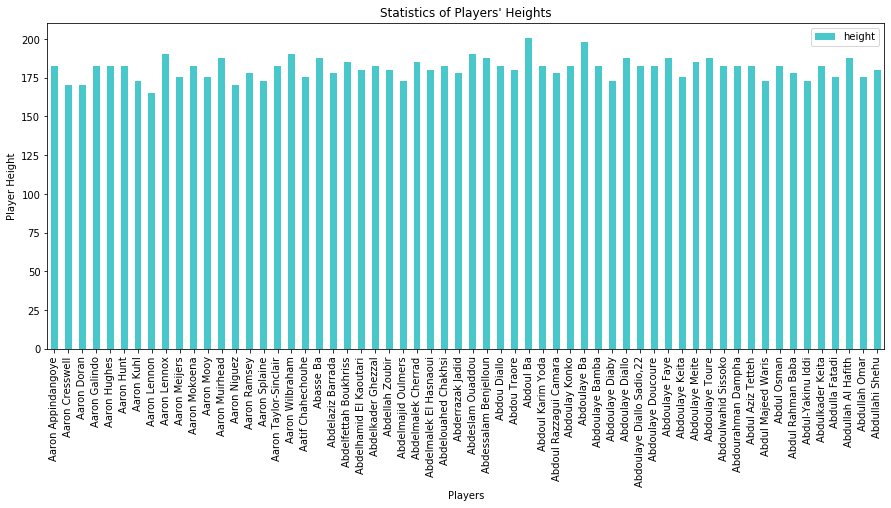

In [105]:
# some of the descriptive statistics about the players' heights
min_height = df_player['height'].min()
max_height = df_player['height'].max()
mean_height = df_player['height'].mean()
mode_height = df_player['height'].mode()

player_height = df_player[['player_name', 'height']].groupby('player_name').mean().head(60)
player_height.plot(kind = 'bar', figsize = (15, 6),color='#49c8cb');
plt.title("Statistics of Players' Heights")
plt.xlabel('Players')
plt.ylabel('Player Height');

print('Minimum Player Height = {}'.format(int(min_height)))
print('Maximum Player Height = {}'.format(int(max_height)))
print('Mean Player Height = {}'.format(int(mean_height)))
print('Mode Player Height = {}'.format(int(mode_height)))

## Does The height of a player Affect his Acceleration?

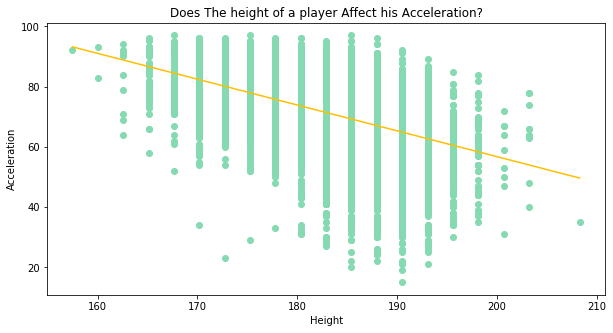

In [106]:
# We drow 'height' column against the 'acceleration' column
df = df_player_attr[['player_name', 'height', 'acceleration']].groupby('player_name').max().head(10000)
x = df['height'].values
y = df['acceleration'].values
plt.figure(figsize=(10, 5))
plt.scatter(x, y,color='#85dab1') 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='#ffbf00');
plt.title("Does The height of a player Affect his Acceleration?")
plt.xlabel('Height')
plt.ylabel('Acceleration');

 we see the taller the player is, the more acceleration he has.

## Research Question 4: Statistics of Players' weight

Maximum Weight of a Player = 243 
Minimum Weight of a Player = 117 
Mean Weight of a Player = 168 
Mode Weight of a Player = 165 


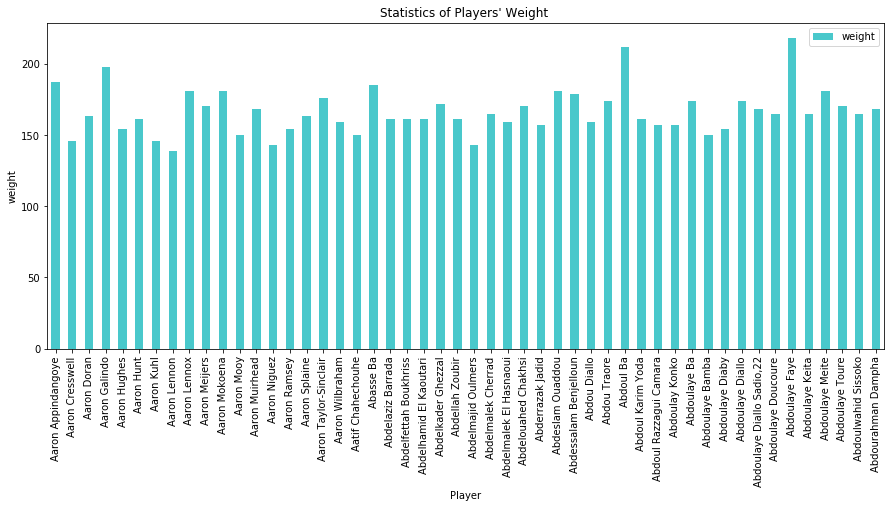

In [107]:
# some of the descriptive statistics about the players' weight
min_weight = df_player['weight'].min()
max_weight = df_player['weight'].max()
mean_weight = df_player['weight'].mean()
mode_weight = df_player['weight'].mode()[0]

print('Maximum Weight of a Player = {} '.format(max_weight))
print('Minimum Weight of a Player = {} '.format(min_weight))
print('Mean Weight of a Player = {} '.format(int(mean_weight)))
print('Mode Weight of a Player = {} '.format(mode_weight))

player_height = df_player[['player_name', 'weight']].groupby('player_name').mean().head(50)
player_height.plot(kind = 'bar', figsize = (15, 6),color='#49c8cb');
plt.title("Statistics of Players' Weight ")
plt.xlabel('Player')
plt.ylabel('weight');

## Does The weight of a player Affect his Shot Power?

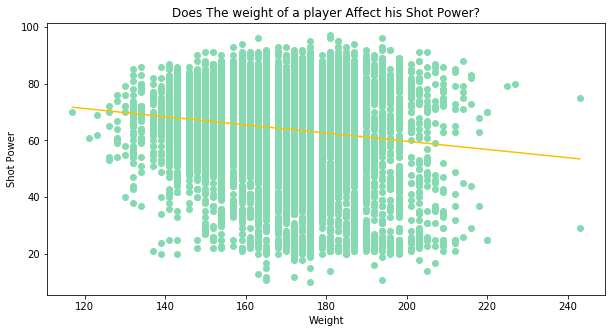

In [108]:
# we drow the 'weight' column against the 'shot_power' column
df = df_player_attr[['player_name', 'weight', 'shot_power']].groupby('player_name').max().head(10000)

x = df['weight'].values
y = df['shot_power'].values
plt.figure(figsize=(10, 5))
plt.scatter(x, y,color='#85dab1') 
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='#ffbf00');
plt.title("Does The weight of a player Affect his Shot Power?")
plt.xlabel('Weight')
plt.ylabel('Shot Power');

## Research Question 5: What team attributes lead to the most victories?


we need to know which teams has the most victories. let's, we look at the match table where the season is 2015/2016 for that purpose.

In [109]:
df_match= pd.read_csv('matches_clean.csv')
df_match.head()

,id,date,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,away_team_name,winners
0,1,2008-08-17,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Tie
1,29,2008-11-15,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare,Tie
2,47,2008-11-29,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge,KRC Genk
3,65,2008-12-13,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi,KRC Genk
4,94,2009-01-24,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons,KRC Genk


In [110]:
df_match_season = df_match.query('start_season == 2015 and end_season == 2016')

In [111]:
winners = df_match_season.groupby('winners')['id'].count().sort_values(ascending=False)

In [112]:
winners[1:11]

winners
Paris Saint-Germain    30
FC Barcelona           29
Juventus               29
SL Benfica             29
FC Bayern Munich       28
Atlético Madrid        28
Real Madrid CF         28
Sporting CP            27
Celtic                 26
FC Basel               26
Name: id, dtype: int64

we found the 10 most winners in 2015/2016 season

In [113]:
team_attr = pd.read_csv('team_attributes_edited.csv')
team_attr.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name,year
0,1,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,Organised,...,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR,2010
1,2,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,Organised,...,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR,2014
2,3,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,Organised,...,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR,2015
3,4,8485,2010-02-22,70,Fast,NaN,Little,70,Long,Organised,...,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE,2010
4,5,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,Organised,...,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE,2011


There are 27 columns in the team attributes table, we want to see only the numerical columns along with the team name column.

In [114]:
columns = ['team_long_name', 'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing',\
           'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',\
           'defencePressure', 'defenceAggression', 'defenceTeamWidth']

In [115]:
# the name of the ten winners
ten_winners = winners[1:11].index

In [116]:
winners_stats = team_attr.query('(year == 2015 or year == 2016) and team_long_name in @ten_winners')[columns]

In [117]:
winners_stats

,team_long_name,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
99,Atlético Madrid,57,50.0,50,61,62,49,49,42,52
123,FC Barcelona,36,35.0,51,36,49,56,61,65,65
135,FC Basel,61,63.0,46,66,66,54,47,58,53
147,FC Bayern Munich,45,24.0,28,37,31,22,72,53,59
165,SL Benfica,69,55.0,53,65,66,54,60,57,54
293,Celtic,54,49.0,53,51,51,62,58,55,56
627,Juventus,50,35.0,20,65,50,80,35,65,35
963,Paris Saint-Germain,49,47.0,34,62,61,35,57,53,56
1050,Real Madrid CF,50,57.0,46,61,41,63,52,60,63
1194,Sporting CP,57,65.0,56,42,50,55,60,60,54


The chart reveals 9 different attributes of 10 winners in 2015-16. To analyze sequential data.

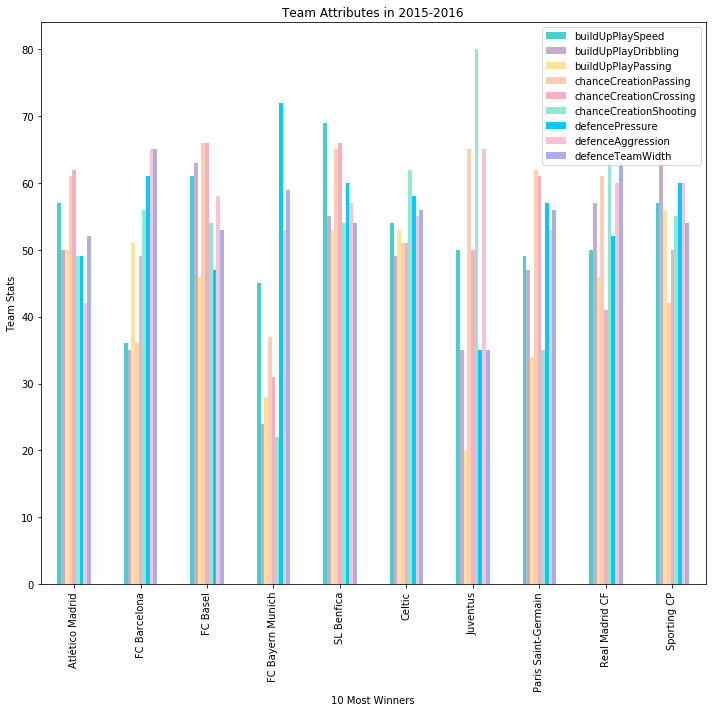

In [118]:
fig, ax = plt.subplots(figsize=(10, 10))
colors = ['#44d0cc','#CBAACB','#ffe297','#FFCCB6','#F3B0C3','#8fe9d7','#00ccff','#ffc0d3','#abafe8','#cc99cc']
# create a bar char
ax = winners_stats.plot.bar(ax=ax ,color=colors);
ax.set_xticklabels(winners_stats['team_long_name'])

# the chart's title
ax.set_title('Team Attributes in 2015-2016')

# the y axis label
ax.set_ylabel('Team Stats')

# the y axis label 
plt.xlabel("10 Most Winners")

plt.tight_layout();

### Research Question 6 (What is the Total matchs, wins, goals per League?) 

### let's see stats about Leagues, teams, matches and goals.

In [120]:
df_match.head()

,id,date,home_team_goal,away_team_goal,year,start_season,end_season,country_name,league_name,home_team_name,away_team_name,winners
0,1,2008-08-17,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Tie
1,29,2008-11-15,1,1,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare,Tie
2,47,2008-11-29,3,2,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge,KRC Genk
3,65,2008-12-13,1,0,2008,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi,KRC Genk
4,94,2009-01-24,2,0,2009,2008,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons,KRC Genk


In [121]:
df_match.groupby(['league_name'])['id'].count()

league_name
Belgium Jupiler League      1698
England Premier League      3040
France Ligue 1              3040
Germany 1. Bundesliga       2448
Italy Serie A               3017
Netherlands Eredivisie      2448
Poland Ekstraklasa          1755
Portugal Liga ZON Sagres    2052
Scotland Premier League     1824
Spain LIGA BBVA             3040
Switzerland Super League    1422
Name: id, dtype: int64

now we see tatal matches per league

In [132]:
df_match.query('winners == "Tie"').groupby(['league_name'])['winners'].count()

league_name
Belgium Jupiler League      418
England Premier League      783
France Ligue 1              859
Germany 1. Bundesliga       597
Italy Serie A               796
Netherlands Eredivisie      581
Poland Ekstraklasa          470
Portugal Liga ZON Sagres    533
Scotland Premier League     447
Spain LIGA BBVA             704
Switzerland Super League    346
Name: winners, dtype: int64

 also this is  total Draws per League

In [133]:
df_match.query('winners != "Tie"')['league_name'].value_counts()

Spain LIGA BBVA             2336
England Premier League      2257
Italy Serie A               2221
France Ligue 1              2181
Netherlands Eredivisie      1867
Germany 1. Bundesliga       1851
Portugal Liga ZON Sagres    1519
Scotland Premier League     1377
Poland Ekstraklasa          1285
Belgium Jupiler League      1280
Switzerland Super League    1076
Name: league_name, dtype: int64

and this total Wins per League

In [135]:
df_match['match_goals'] = df_match['home_team_goal'] + df_match['away_team_goal']

We will add a column of matches goals that will include ('home_team_goal' ,'away_team_goal')

In [136]:
#total Goals per League
df_match.groupby(['league_name'])['match_goals'].sum()

league_name
Belgium Jupiler League      4754
England Premier League      8240
France Ligue 1              7427
Germany 1. Bundesliga       7103
Italy Serie A               7895
Netherlands Eredivisie      7542
Poland Ekstraklasa          4254
Portugal Liga ZON Sagres    5201
Scotland Premier League     4804
Spain LIGA BBVA             8412
Switzerland Super League    4166
Name: match_goals, dtype: int64

 most season with goals

In [137]:
season_goals = df_match.groupby(['league_name','start_season','end_season'])['match_goals'].sum()
season_goals.nlargest(1)

league_name      start_season  end_season
Spain LIGA BBVA  2008          2009          1101
Name: match_goals, dtype: int64

Now we knew most season with goals by the name of league ,the beginning and end of the season ,and the number of matches goals.

In [145]:
df_match.groupby(['league_name'])['match_goals'].max()

league_name
Belgium Jupiler League       9
England Premier League      10
France Ligue 1              10
Germany 1. Bundesliga       11
Italy Serie A                9
Netherlands Eredivisie      10
Poland Ekstraklasa           8
Portugal Liga ZON Sagres     9
Scotland Premier League     12
Spain LIGA BBVA             12
Switzerland Super League     9
Name: match_goals, dtype: int64

  the most match Goals per League

Text(0, 0.5, 'Wins')

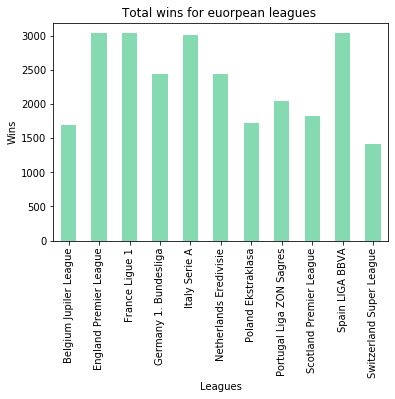

In [146]:
df_match.groupby(['league_name'])['winners'].count().plot(kind='bar', title='Total wins for euorpean leagues ',color='#85dab1');
plt.xlabel('Leagues')
plt.ylabel('Wins')
#plot the all wins

,'England Premier league' ,'France Ligue' ,'Italy Serie A','Spain LIGA BBVA' have most played matches , in addition to  that
Season 2008/2009 in Spain LIGA BBVA have highest number of goals by 1101 goals in all Leagues from 2008 to 2016.

### Research Question 7 : How has FC Barcelona United's performance been over the years at Home and Away? 

In [140]:
# we find the team id of FC Barcelona United and details for FC Barcelona United in the team data
df_team[df_team['team_long_name'].str.contains('FC Barcelona')]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
258,43042,8634,241.0,FC Barcelona,BAR


In [141]:
#we have found the team_api_id for FC Barcelona is:
team_api_id_BU=8634

#Now that we have the team_api_id we fetch only data for FC Barcelona
match_BU=pd.read_sql_query('SELECT * FROM Match where home_team_api_id =8634 OR away_team_api_id=8634',soccer)

#Data frame contains of additional columns which we won't be using in our analysis.
match_BU = match_BU.iloc[:, :77]
match_BU.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,21521,21518,21518,2008/2009,1,2008-08-31 00:00:00,530086,8388,8634,1,...,33988.0,30661.0,30740.0,30738.0,39854,36615.0,30955.0,30981.0,33639,30626
1,21535,21518,21518,2008/2009,10,2008-11-08 00:00:00,530240,8634,10281,6,...,37597.0,37672.0,38065.0,2790.0,33586,33588.0,33820.0,75192.0,33729,39142
2,21547,21518,21518,2008/2009,11,2008-11-16 00:00:00,530252,8479,8634,0,...,33988.0,30740.0,37482.0,30661.0,154257,36615.0,39854.0,30981.0,33639,30626
3,21550,21518,21518,2008/2009,12,2008-11-23 00:00:00,530255,8634,8305,1,...,37473.0,32675.0,37427.0,37468.0,41156,27420.0,37471.0,37461.0,37474,37469
4,21564,21518,21518,2008/2009,13,2008-11-29 00:00:00,530329,8302,8634,0,...,33988.0,30740.0,37482.0,30661.0,39854,36615.0,26146.0,30981.0,33639,30626


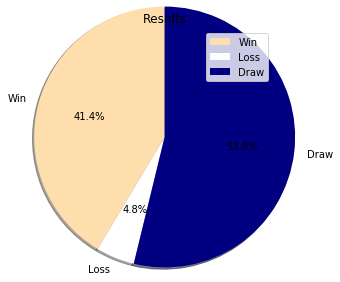

In [154]:
#declaring and initializing variables to store values of matches won ,lost or drawn.
home_win=0
draw=0
home_loss=0
away_win=0
away_loss=0
total_win=0
total_loss=0
total=0


# look to the data and increase counts for corresponding values
for row in match_BU.itertuples():
# Checking incrementing Draw
    if (row.away_team_api_id==team_api_id_BU or row.home_team_api_id==team_api_id_BU) and row.home_team_goal==row.home_team_goal:
        draw=draw+1
# Checking condition and incrementing Home win or loss 
    if row.home_team_api_id==team_api_id_BU and row.home_team_goal>row.away_team_goal:
        home_win=home_win+1
    elif row.home_team_api_id==team_api_id_BU and row.home_team_goal<row.away_team_goal:
        home_loss=home_loss+1
# Checking incrementing Away win or loss
    if row.away_team_api_id==team_api_id_BU and row.home_team_goal>row.away_team_goal:
        away_loss=away_loss+1
    elif row.away_team_api_id==team_api_id_BU and row.home_team_goal<row.away_team_goal:
        away_win=away_win+1


Total_win=home_win+away_win
Total_loss=home_loss+away_loss
Total=draw+Total_win+Total_loss

#As the data we have found is of 3 variables , so we displaying it using a Pie chart 
results = ['Win', 'Loss', 'Draw'] 
slices = [Total_win,Total_loss,draw] 

# color for each label 
colors = ['#FFDEAD', '#FFFFFF','#000080'] 
  
plt.pie(slices, labels = results, colors=colors,  
        startangle=90, shadow = True, 
        radius = 1.5, autopct = '%1.1f%%')
#the pie chart a title
plt.title('Results') 

plt.legend() 
plt.show()

FC Barcelona united had a majority of it's matches withba result of draw followed by wins and then little loss.

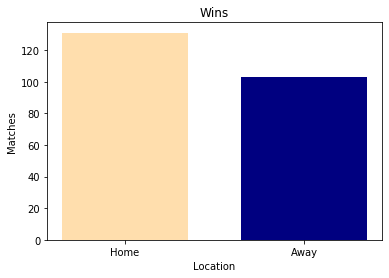

In [150]:
# Here we want to view the comparison between the home wins and away wins 
left = [1, 2]
  
# heights of bars 
height = [home_win, away_win]
  
# labels for bars 
tick_label = ['Home','Away'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.7, color = ['#FFDEAD','#000080']) 
  
# plot title 
plt.title('Wins')     
# the x-axis name
plt.xlabel('Location') 
# the y-axis name
plt.ylabel('Matches') 

  
#to show the plot 
plt.show()

FC Barcelona United has won more matches at Home as compared to Away

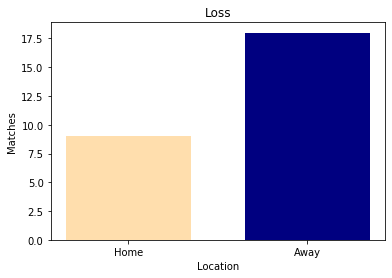

In [151]:
# Here we want to view the comparison between the home losses and away losses
  
# heights of bars 
height = [home_loss, away_loss]
  
# labels for bars 
tick_label = ['Home','Away'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.7, color = ['#FFDEAD','#000080']) 
  
# plot title 
plt.title('Loss')     
    
# the x-axis name
plt.xlabel('Location') 
# the y-axis name
plt.ylabel('Matches') 

  
#to show the plot 
plt.show()

 FC Barcelona United has has lost more matches at Away as compared to Home.

<a id='conclusions'></a>
## Conclusions
1. What teams improved the most over the time period?

Based on the years I have selected, the most improved teams over the period by looking at the average away and home goals are 'lechia Gdansk','paris saint-Germain','sporting Cp','podbeskidzie Bielsko-Biala','FC Barcelona'

2. Which players had the most penalties?
The following players have the most number of penalties:

   1. Alessio Cerci (4314)
   2. Mario Balotelli (4120)
   3. Claudio Marchisio (3984)
   4. Michael Bradley (3813)
   5. Zdravko Kuzmanovic (3799)
   6. Andrea Pirlo (3791)
   7. Antonio Di Natale (3767)
   8. Thierry Henry (3712)
   9. Adrien Silva (3682)
   10. Adel Taarabt (3650)


3.  Statistics of Players' Heights

Minimum Player Height = 157
Maximum Player Height = 208
Mean Player Height = 181
Mode Player Height = 182
. Does The height of a player Affect his Acceleration?
There is a moderate negative correlation between the height and the acceleration of a player,the taller the player is, the more acceleration he has

4. Statistics of Players' weight

Maximum Weight of a Player = 243 
Minimum Weight of a Player = 117 
Mean Weight of a Player = 168.77616767313305 
Mode Weight of a Player = 165 
. Does The weight of a player Affect his Shot Power?
There is a moderate negative correlation between the weight and the shot power of a player,the more weight of a player, the less shot power he has.



5. What team attributes lead to the most victories?

 I have selected a season which was the 2015/2016 season.I have found 10 most winners (Paris Saint-Germain, FC Barcelona, Juventus, SL Benfica, Real Madrid CF, FC Bayern Munich, Atlético Madrid, Sporting CP, FC Basel, PSV). The bar char demostrates that the most team attributes that lead the teams to win depend on the changeCreationPassing, defencePressure, defenceAggression, buildUpSpeed, and buildUpDribbling column.

6. What is the Total matchs, wins, goals per League?

'Italy Serie A' ,'England Premier' ,'France Ligue' Spain LIGA BBVA  have most played matches

7. How has FC Barcelona United's performance been over the years at Home and Away?

FC Barcelona united had a majority of it's matches withba result of draw followed by wins and then little loss,
FC Barcelona  United has won more matches at Home as compared to Away.
Also, it has lost more matches at Away as compared to Home.

### Limitations
Data needed few steps to be cleaned as,  Dates columns data types are existed as string. 

The Match table are the most challanging tables among the others in the Soccer database.
The Match table contained 407395 missing values such as Goal,shoton,shotoff etc which could have been used for analysis if they were provided accurately.. I have dediced to not fill the missing values with a specific value bacause the most missing values are about betting in which I am not interested. so I dropped the columns contaning missing values our new table shows the first 11 columns which it makes sense for questions , I have used 4 merge operations to collect the necessary information from other tables. The Match table has a relation with Player, Country, and League tables. Also there are some columns that I needed to simplify in order to solve the questions. For example, I split the column session into two seperate columns namely start_season and end_season.The Date column needed to be converted to datatime because I wanted to declare a new column for the yearsto know who won a match, I have created another column by looking at the four columns. The steps I have taken helped me find the solutions of What teams improved the most over the time period?

 the Team table too. I found 3 teams having the same fifa_id and team_name. Grouping by fifa_id and team_name found the duplicated rows.

One missing column that appears in the Player Attributes table is the buildUpPlayDribbling column. I haven't paid too much attention to that column because I have interpred the missing values as zeros to answer What team attributes lead to the most victories?. The Player Attributes table also contains a relation with the Player table. Applying a merge step solved to find the details of players such as birthday, height, and weight.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])